In [1]:
import numpy as np
from qiskit.opflow import (
    Z,
    X,
    Y,
    I,
    Plus,
    Minus,
    Zero, One,
    CX, S, H, T, CZ, Swap,
    TensoredOp
)
from qiskit import QuantumCircuit
from qiskit.quantum_info.operators import Operator, Pauli
zero_op = (I + Z) / 2
one_op = (I - Z) / 2

In [2]:
Operator(X).input_dims()[0]

2

# N = 2

In [3]:
Operator(zero_op^one_op).data.real + Operator(one_op^zero_op).data.real

array([[0., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 0.]])

In [4]:
Operator(zero_op^zero_op).data.real + Operator(one_op^one_op).data.real

array([[1., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 1.]])

In [5]:
0.5*(Operator(X^X).data.real - Operator(Y^Y).data.real)

array([[0., 0., 0., 1.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [1., 0., 0., 0.]])

In [6]:
0.5*(Operator(X^X).data.real + Operator(Y^Y).data.real)

array([[0., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 0.]])

In [7]:
- Operator(Y^Y).data.real

array([[-0., -0., -0.,  1.],
       [-0., -0., -1., -0.],
       [-0., -1., -0., -0.],
       [ 1., -0., -0., -0.]])

In [8]:
Operator(I^X).data.real

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]])

In [9]:
Operator(X^I).data.real

array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]])

## Unitary decomposition


In [10]:
from qalcore.qiskit.vqls.numpy_unitary_matrices import UnitaryDecomposition

circuits = []
coefficients = []

# -16 X^I
cxi = QuantumCircuit(2)
cxi.x(0)
cxi.i(1)

circuits.append(cxi)
coefficients.append(-16)

# -4 I^X
cix = QuantumCircuit(2)
cix.x(1)
cix.i(0)

circuits.append(cix)
coefficients.append(-4)

# 12 swap
cs = QuantumCircuit(2)
cs.swap(0,1)

circuits.append(cs)
coefficients.append(12)

# 28 swap
cs = QuantumCircuit(2)
cs.swap(0,1)
cs.x(0)
cs.x(1)

circuits.append(cs)
coefficients.append(28)

# -20 XX
cs = QuantumCircuit(2)
cs.x(0)
cs.x(1)

circuits.append(cs)
coefficients.append(-20)

mat = UnitaryDecomposition(circuits=circuits, coefficients=coefficients)
mat.get_matrix_from_circuits()


array([[ 12.+0.j, -16.+0.j,  -4.+0.j,   8.+0.j],
       [-16.+0.j,  28.+0.j,  -8.+0.j,  -4.+0.j],
       [ -4.+0.j,  -8.+0.j,  28.+0.j, -16.+0.j],
       [  8.+0.j,  -4.+0.j, -16.+0.j,  12.+0.j]])

In [11]:
c = QuantumCircuit(1)
c.u(np.pi,-np.pi,np.pi,[0])
Operator(c)

Operator([[ 6.123234e-17+0.0000000e+00j,  1.000000e+00-1.2246468e-16j],
          [-1.000000e+00-1.2246468e-16j,  6.123234e-17+0.0000000e+00j]],
         input_dims=(2,), output_dims=(2,))

In [12]:
c = QuantumCircuit(2)
c.y(1)
c.y(0)
Operator(c).data.real

array([[ 0.,  0.,  0., -1.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  0.],
       [-1.,  0.,  0.,  0.]])

In [13]:
mat = Operator(Y^Y).data.real


In [14]:
Operator(X^X)

Operator([[0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

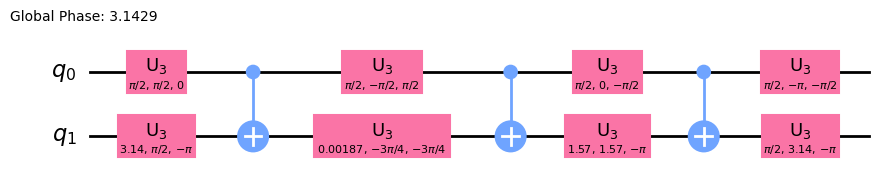

In [15]:
m = Operator(Swap).data.real
op = Operator(m)
circ =QuantumCircuit(2)
circ.unitary(m,[0,1])
circ.decompose().draw('mpl')

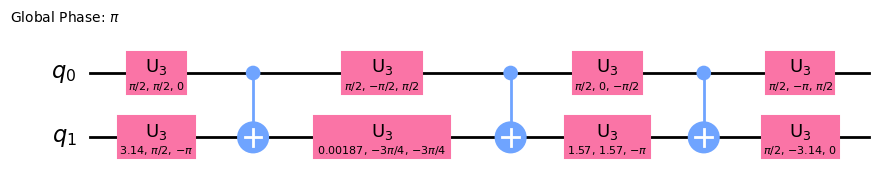

In [16]:
m = np.zeros((4,4))
m[0,3] = m[3,0] = m[1,1] = m[2,2] = 1
op = Operator(m)
circ =QuantumCircuit(2)
circ.unitary(m,[0,1])
circ.decompose().draw('mpl')


In [17]:
c = QuantumCircuit(1)
c.u(np.pi/2,-np.pi/2,np.pi/2,[0])
Operator(c).data

array([[ 7.07106781e-01+0.j        , -4.32978028e-17-0.70710678j],
       [ 4.32978028e-17-0.70710678j,  7.07106781e-01+0.j        ]])

In [18]:
c=QuantumCircuit(1)
c.h(0)
c.s(0)
# c.z(0)
Operator(c).data

array([[0.70710678+0.j        , 0.70710678+0.j        ],
       [0.        +0.70710678j, 0.        -0.70710678j]])

In [19]:
circ = QuantumCircuit(2)
circ.swap(0,1)
circ.x(0)
circ.x(1)
Operator(circ).data.real

array([[0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.]])

# N = 3 

In [20]:
Operator(TensoredOp([zero_op]*3)).data.real + Operator(TensoredOp([one_op]*3)).data.real

array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

In [21]:
Operator(zero_op^TensoredOp(2*[one_op])).data.real + Operator(one_op^TensoredOp(2*[zero_op])).data.real

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

In [22]:
Operator(zero_op^one_op^zero_op).data.real + Operator(one_op^zero_op^one_op).data.real

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

In [23]:
Operator(zero_op^zero_op^one_op).data.real + Operator(one_op^one_op^zero_op).data.real

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

In [24]:
-768*(Operator(zero_op^zero_op^X).data.real + Operator(one_op^one_op^X).data.real)

array([[  -0., -768.,   -0.,   -0.,   -0.,   -0.,   -0.,   -0.],
       [-768.,   -0.,   -0.,   -0.,   -0.,   -0.,   -0.,   -0.],
       [  -0.,   -0.,   -0.,   -0.,   -0.,   -0.,   -0.,   -0.],
       [  -0.,   -0.,   -0.,   -0.,   -0.,   -0.,   -0.,   -0.],
       [  -0.,   -0.,   -0.,   -0.,   -0.,   -0.,   -0.,   -0.],
       [  -0.,   -0.,   -0.,   -0.,   -0.,   -0.,   -0.,   -0.],
       [  -0.,   -0.,   -0.,   -0.,   -0.,   -0.,   -0., -768.],
       [  -0.,   -0.,   -0.,   -0.,   -0.,   -0., -768.,   -0.]])

In [25]:
-512*(Operator(zero_op^one_op^X).data.real + Operator(one_op^zero_op^X).data.real)

array([[  -0.,   -0.,   -0.,   -0.,   -0.,   -0.,   -0.,   -0.],
       [  -0.,   -0.,   -0.,   -0.,   -0.,   -0.,   -0.,   -0.],
       [  -0.,   -0.,   -0., -512.,   -0.,   -0.,   -0.,   -0.],
       [  -0.,   -0., -512.,   -0.,   -0.,   -0.,   -0.,   -0.],
       [  -0.,   -0.,   -0.,   -0.,   -0., -512.,   -0.,   -0.],
       [  -0.,   -0.,   -0.,   -0., -512.,   -0.,   -0.,   -0.],
       [  -0.,   -0.,   -0.,   -0.,   -0.,   -0.,   -0.,   -0.],
       [  -0.,   -0.,   -0.,   -0.,   -0.,   -0.,   -0.,   -0.]])

In [26]:
-576*(Operator(zero_op^X^zero_op).data.real + Operator(one_op^X^one_op).data.real)

array([[  -0.,   -0., -576.,   -0.,   -0.,   -0.,   -0.,   -0.],
       [  -0.,   -0.,   -0.,   -0.,   -0.,   -0.,   -0.,   -0.],
       [-576.,   -0.,   -0.,   -0.,   -0.,   -0.,   -0.,   -0.],
       [  -0.,   -0.,   -0.,   -0.,   -0.,   -0.,   -0.,   -0.],
       [  -0.,   -0.,   -0.,   -0.,   -0.,   -0.,   -0.,   -0.],
       [  -0.,   -0.,   -0.,   -0.,   -0.,   -0.,   -0., -576.],
       [  -0.,   -0.,   -0.,   -0.,   -0.,   -0.,   -0.,   -0.],
       [  -0.,   -0.,   -0.,   -0.,   -0., -576.,   -0.,   -0.]])

In [27]:
-640 * ( 0.5 * Operator(I ^ ((X^X) + (Y^Y))).data.real )

array([[  -0.,   -0.,   -0.,   -0.,   -0.,   -0.,   -0.,   -0.],
       [  -0.,   -0., -640.,   -0.,   -0.,   -0.,   -0.,   -0.],
       [  -0., -640.,   -0.,   -0.,   -0.,   -0.,   -0.,   -0.],
       [  -0.,   -0.,   -0.,   -0.,   -0.,   -0.,   -0.,   -0.],
       [  -0.,   -0.,   -0.,   -0.,   -0.,   -0.,   -0.,   -0.],
       [  -0.,   -0.,   -0.,   -0.,   -0.,   -0., -640.,   -0.],
       [  -0.,   -0.,   -0.,   -0.,   -0., -640.,   -0.,   -0.],
       [  -0.,   -0.,   -0.,   -0.,   -0.,   -0.,   -0.,   -0.]])

In [28]:
-448 * (Operator(zero_op^X^one_op).data.real + Operator(one_op^X^zero_op).data.real)

array([[  -0.,   -0.,   -0.,   -0.,   -0.,   -0.,   -0.,   -0.],
       [  -0.,   -0.,   -0., -448.,   -0.,   -0.,   -0.,   -0.],
       [  -0.,   -0.,   -0.,   -0.,   -0.,   -0.,   -0.,   -0.],
       [  -0., -448.,   -0.,   -0.,   -0.,   -0.,   -0.,   -0.],
       [  -0.,   -0.,   -0.,   -0.,   -0.,   -0., -448.,   -0.],
       [  -0.,   -0.,   -0.,   -0.,   -0.,   -0.,   -0.,   -0.],
       [  -0.,   -0.,   -0.,   -0., -448.,   -0.,   -0.,   -0.],
       [  -0.,   -0.,   -0.,   -0.,   -0.,   -0.,   -0.,   -0.]])

In [29]:
-384*( 0.5*(Operator( I^((X^X) - (Y^Y))).data.real) )

array([[  -0.,   -0.,   -0., -384.,   -0.,   -0.,   -0.,   -0.],
       [  -0.,   -0.,   -0.,   -0.,   -0.,   -0.,   -0.,   -0.],
       [  -0.,   -0.,   -0.,   -0.,   -0.,   -0.,   -0.,   -0.],
       [-384.,   -0.,   -0.,   -0.,   -0.,   -0.,   -0.,   -0.],
       [  -0.,   -0.,   -0.,   -0.,   -0.,   -0.,   -0., -384.],
       [  -0.,   -0.,   -0.,   -0.,   -0.,   -0.,   -0.,   -0.],
       [  -0.,   -0.,   -0.,   -0.,   -0.,   -0.,   -0.,   -0.],
       [  -0.,   -0.,   -0.,   -0., -384.,   -0.,   -0.,   -0.]])

In [60]:
sp = Operator(np.array([[0,1],[0,0]]))
sm = Operator(np.array([[0,0],[1,0]]))

Operator(sp^sm^sp).data.real

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

In [31]:
Operator(np.array([[0,1],[-1,0]])).data.real

array([[ 0.,  1.],
       [-1.,  0.]])

In [32]:
Operator(X-Y)

Operator([[0.+0.j, 1.+1.j],
          [1.-1.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))

In [56]:
r = Operator(np.array([[1,2],[2,-1]]))
Operator(X).data@r.data

array([[ 2.+0.j, -1.+0.j],
       [ 1.+0.j,  2.+0.j]])

In [47]:
Operator(Swap).data @ r.data

array([[ 1.+0.j,  2.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  3.+0.j,  1.+0.j],
       [ 2.+0.j, -1.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  1.+0.j,  3.+0.j]])

In [57]:
Operator(np.array())^r

Operator([[ 0.+0.j,  0.+0.j,  1.+0.j,  2.+0.j],
          [ 0.+0.j, -0.+0.j,  2.+0.j, -1.+0.j],
          [ 1.+0.j,  2.+0.j,  0.+0.j,  0.+0.j],
          [ 2.+0.j, -1.+0.j,  0.+0.j, -0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

In [64]:
m3 = np.array([[ 
   84., -48., -36., -24., -12.,   0.,  12.,  24.],
 [-48., 116., -40., -28., -16.,  -4.,   8.,  12.],
 [-36., -40., 140., -32., -20.,  -8.,  -4.,   0.],
 [-24., -28., -32., 156., -24., -20., -16., -12.],
 [-12., -16., -20., -24., 156., -32., -28., -24.],
 [  0.,  -4.,  -8., -20., -32., 140., -40., -36.],
 [ 12.,   8.,  -4., -16., -28., -40., 116., -48.],
 [ 24.,  12.,   0., -12., -24., -36., -48.,  84.]])


In [65]:
m3[0:4,4:8]

array([[-12.,   0.,  12.,  24.],
       [-16.,  -4.,   8.,  12.],
       [-20.,  -8.,  -4.,   0.],
       [-24., -20., -16., -12.]])

In [68]:
Operator( (zero_op^zero_op) + (one_op^one_op)).data.real

array([[1., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 1.]])

In [89]:
Operator(((sp^sp^sp) + (sm^sm^sm))).data

array([[0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]])

In [94]:
Operator((2*I^I) - (I^X) -0.5 * (X^X) -0.5*(Y^Y)).data.real

array([[ 2., -1.,  0.,  0.],
       [-1.,  2., -1.,  0.],
       [ 0., -1.,  2., -1.],
       [ 0.,  0., -1.,  2.]])

In [95]:
Operator(I^X).data.real

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]])

In [102]:
Operator( (2*I^I^I) - (I^I^X) - (0.5*I^X^X) - (0.5*I^Y^Y) -(0.25*X^X^X) - (0.25*Y^Y^X) -(0.25*Y^X^Y) + (0.25*X^Y^Y) ).data.real

array([[ 2., -1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-1.,  2., -1.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -1.,  2., -1.,  0.,  0.,  0.,  0.],
       [ 0.,  0., -1.,  2., -1.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  2., -1.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -1.,  2., -1.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -1.,  2., -1.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  2.]])

In [103]:
Operator(I^I^X).data.real

array([[0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0.]])

In [116]:
Operator( (X^X^X) - (Y^X^Y) - (Y^Y^X) - (X^Y^Y)).data.real

array([[0., 0., 0., 0., 0., 0., 0., 4.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [4., 0., 0., 0., 0., 0., 0., 0.]])

In [117]:
Operator( (zero_op^zero_op^zero_op) + (one_op^one_op^one_op))

Operator([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j]],
         input_dims=(2, 2, 2), output_dims=(2, 2, 2))

In [128]:
Operator((I^I^I) + (I^Z^Z) + (Z^I^Z) + (Z^Z^I)).data.real

array([[4., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 4.]])

In [122]:
Operator( (zero_op^zero_op^zero_op)).data.real

array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

In [126]:
Operator( (I^I^I) + (I^I^Z) + (I^Z^Z) + (I^Z^I) + (Z^I^I) + (Z^I^Z)+(Z^Z^I) + (Z^Z^Z)).data.real

array([[8., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

In [130]:
Operator(zero_op^X^X).data.real

array([[0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

In [133]:
Operator(Z^X^X).data.real 


array([[ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0., -1.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -1.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -1.,  0.,  0.,  0.]])

In [134]:
from typing import Optional, List, Union, Dict, Sequence
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.circuit.parameterexpression import ParameterValueType
from qiskit.circuit.register import Register
from qiskit.circuit.bit import Bit
from qiskit.quantum_info.operators import Operator
import numpy as np


class ShiftOperator(QuantumCircuit):

    def __init__(
        self,
        regs: Union[Register, int, Sequence[Bit]],
        name: Optional[str] = None,
        global_phase: ParameterValueType = 0,
        metadata: Optional[Dict] = None,
        use_mct_ancilla: bool = False
    ):

        self.qreg = QuantumRegister(regs)
        super().__init__(self.qreg)
        

        if not use_mct_ancilla:
            for i in reversed(range(1, self.num_qubits)):
                self.mct(self.qreg[:i], self.qreg[i])
            self.x(self.qreg[0])
        else:
            qreg_shift_ancilla = QuantumRegister(self.num_qubits-3, 'q_shift_ancilla')
            self.add_register(qreg_shift_ancilla)
            for i in reversed(range(1, self.num_qubits)):
                self.mct(self.qreg[:i], self.qreg[i], qreg_shift_ancilla, mode='v-chain')
            self.x(self.qreg[0])

In [139]:
s = ShiftOperator(2)
Operator(s).compose(Operator(I^X)).compose(s).data.real

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]])

In [2]:
896-448-64

384